In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors, cm 

%matplotlib inline 

In [2]:
df = pd.read_csv('./data/AB_NYC_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
df.sample(frac=0.25).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
44978,34485745,Midtown Manhattan Stunner - Private room,261632622,Royalton,Manhattan,Theater District,40.75491,-73.98507,Private room,100,1,3,2019-06-16,3.00,9,318
34758,27551807,The St Marks: A large 7 bedroom 15 mins to Man...,5589082,Jenn & JJ,Brooklyn,Crown Heights,40.67578,-73.94159,Entire home/apt,689,2,18,2019-05-23,1.61,1,340
36888,29328881,"Sunny, spacious 1 Bedroom Apt in the East Village",4205284,Danielle,Manhattan,East Village,40.73122,-73.98652,Entire home/apt,240,2,2,2019-05-23,0.28,1,53
34104,27027786,Prime East Village Manhattan w/ Beautiful Back...,203357182,Thomas,Manhattan,East Village,40.72769,-73.98498,Private room,150,1,3,2019-06-22,2.09,1,27
20512,16333020,Amazing 3BR Triplex Family Apartment w/ Garden,106837455,Lisa,Manhattan,Upper West Side,40.78467,-73.98192,Entire home/apt,900,30,0,NaN,NaN,8,362


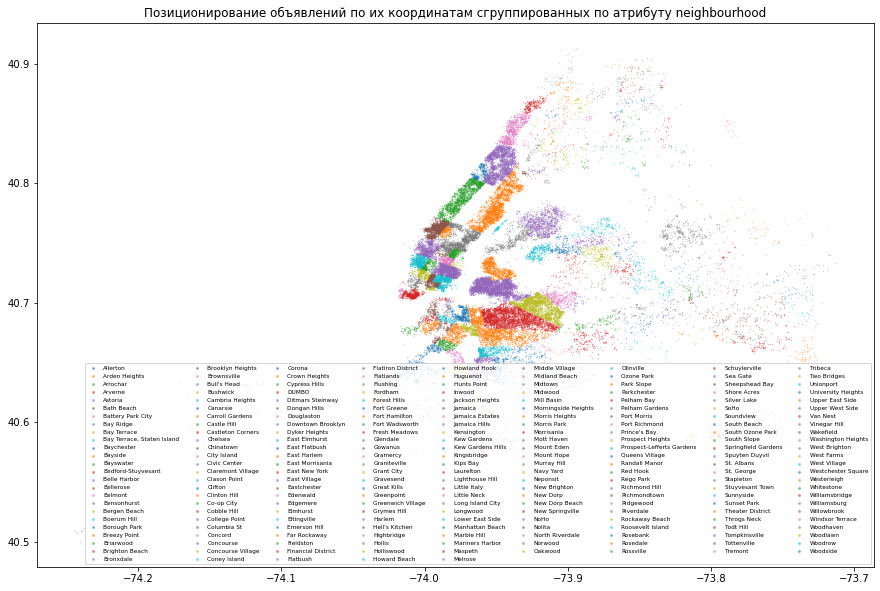

In [166]:
plt.figure(figsize=(15, 10))
for name, group in df.groupby(['neighbourhood']):
    plt.scatter(group['longitude'], group['latitude'], s=0.1, label=name, alpha=0.45)

plt.legend(markerscale=6, ncol=9, fontsize='xx-small')
plt.title('Позиционирование объявлений по их координатам сгруппированных по атрибуту neighbourhood')
plt.show()

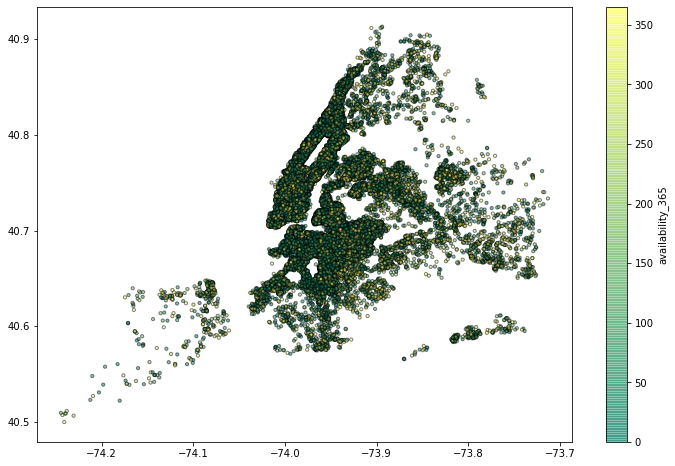

In [168]:
# tst_df = df[(df['availability_365'] < 100)]
tst_df = df
plt.figure(figsize=(12, 8))
plt.scatter(tst_df['longitude'], tst_df['latitude'], c=tst_df['availability_365'], s=10, label=name, alpha=0.5, cmap='summer', edgecolor='black')
plt.colorbar(label='availability_365')
plt.show()

In [160]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

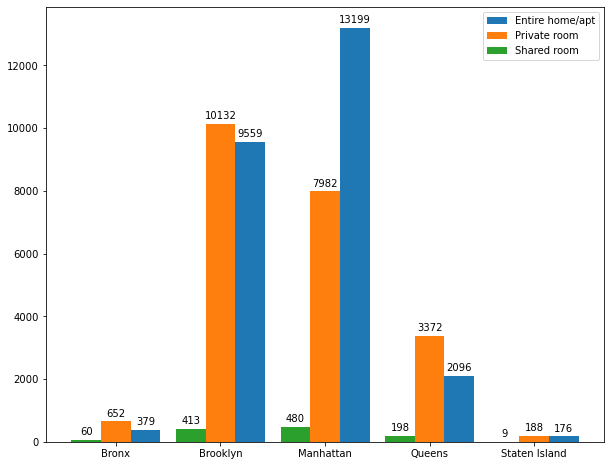

In [171]:
plt.figure(figsize=(10, 8))
pad = 0.15
width = (1 - pad) / df['room_type'].nunique()
x = np.arange(df['neighbourhood_group'].nunique())

i = -1
for name, group in df.groupby(['room_type']):
    bars = plt.bar(x - i*width, group.groupby(['neighbourhood_group']).size().values, width=width, label=name)
    autolabel(bars)
    i += 1

plt.legend()
plt.xticks(x, list(df.groupby('neighbourhood_group').groups.keys()))
plt.show()

In [126]:
pivot = df.pivot_table(index='room_type', columns='neighbourhood_group', values='price', aggfunc='mean')
pivot

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,127.506596,178.327545,249.239109,147.050573,173.846591
Private room,66.788344,76.500099,116.776622,71.762456,62.292553
Shared room,59.800000,50.527845,88.977083,69.020202,57.444444


[0.28333333 1.28333333 2.28333333 3.28333333 4.28333333]
[0. 1. 2. 3. 4.]
[-0.28333333  0.71666667  1.71666667  2.71666667  3.71666667]


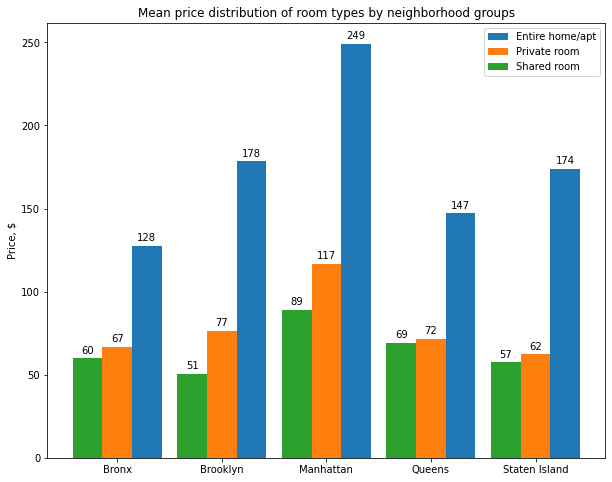

In [172]:
plt.figure(figsize=(10, 8))
pad = 0.15
width = (1 - pad) / len(pivot.index)
x = np.arange(len(pivot.columns))

i = -1
bars = []
for index, row in pivot.iterrows():
    print(x - i*width)
    bar = plt.bar(x - i*width, row.values, width=width, label=index)
    autolabel(bar)
    i += 1

plt.legend()
plt.xticks(x, pivot.columns)
plt.title('Mean price distribution of room types by neighborhood groups')
plt.ylabel('Price, $')
plt.show()

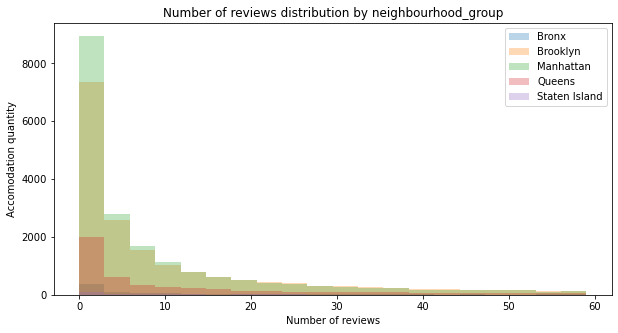

In [164]:
plt.figure(figsize=(10, 5))
filtered_df = df[df['number_of_reviews'] < 60]
for name, group in filtered_df.groupby(['neighbourhood_group']):
    plt.hist(group['number_of_reviews'], label=name, bins=20, alpha=0.3)
plt.xlabel('Number of reviews')
plt.ylabel('Accomodation quantity')
plt.title('Number of reviews distribution by neighbourhood_group')
plt.legend()

Text(0.5, 1.0, 'Number of reviews distribution by neighbourhood_group')

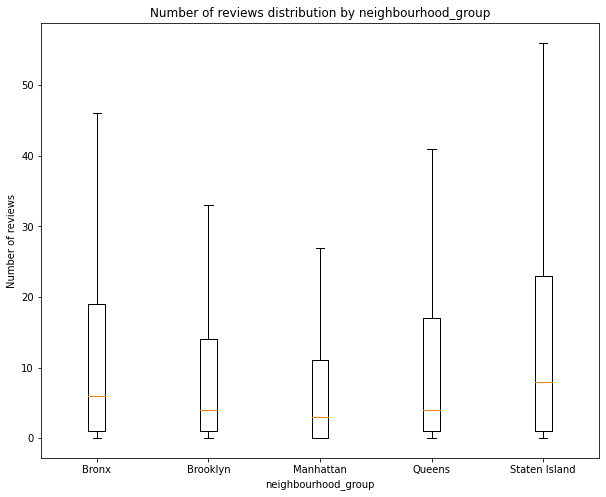

In [153]:
plt.figure(figsize=(10,8))
index = 1
for name, group in filtered_df.groupby(['neighbourhood_group']):
    plt.boxplot(group['number_of_reviews'], positions=[index], labels=[name], autorange=False, showfliers=False)
    index += 1
plt.xlabel('neighbourhood_group')
plt.ylabel('Number of reviews')
plt.title('Number of reviews distribution by neighbourhood_group')